## Make a robot walk iwith pygym

In [2]:
import numpy as np
import tensorflow as tf
import keras
import cv2
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import deque

4
(24,)
obs=
 [ 2.7472877e-03 -2.5883757e-05  2.0134954e-03 -1.5999828e-02
  9.1794893e-02 -2.6571243e-03  8.6036348e-01  3.3659961e-03
  1.0000000e+00  3.2199565e-02 -2.6569467e-03  8.5391486e-01
  1.8791468e-03  1.0000000e+00  4.4081420e-01  4.4582030e-01
  4.6142298e-01  4.8955038e-01  5.3410304e-01  6.0246128e-01
  7.0914918e-01  8.8593221e-01  1.0000000e+00  1.0000000e+00]
info=
 {}
(24,)


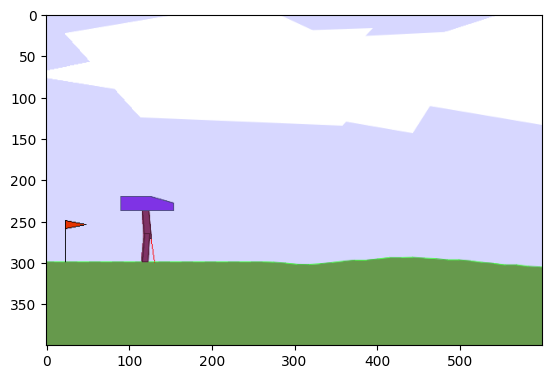

In [3]:
env = gym.make("BipedalWalker-v3",render_mode="rgb_array")
action = env.action_space
print(action.shape[0])
obs, info = env.reset(seed=0)
print(obs.shape)
print("obs=\n",obs)
print("info=\n",info)
print(obs.shape)
im = env.render()
plt.imshow(im)
plt.show()

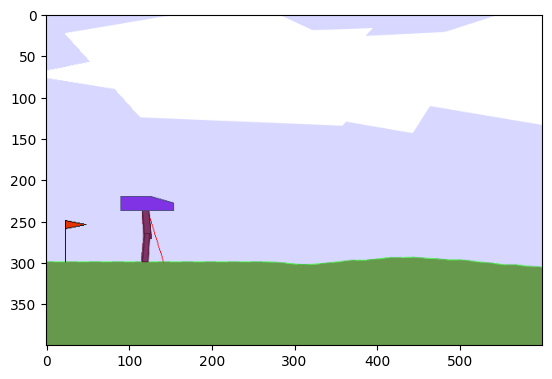

In [4]:
im = env.render()
plt.imshow(im)
plt.show()

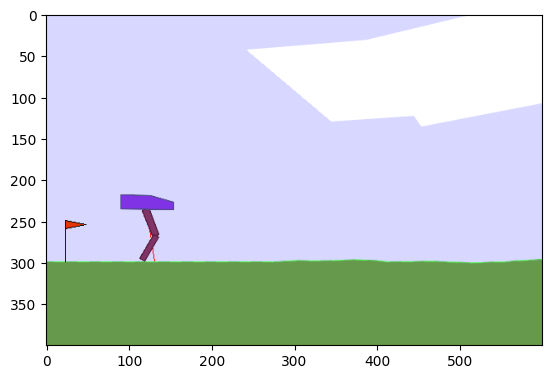

[-0.00851368 -0.00623508 -0.00780538 -0.00359726  0.44559902  0.34748486
  0.10314339 -0.3943403   1.          0.3467904   0.15839326  0.10611534
 -0.14178996  1.          0.4488897   0.4539875   0.46987602  0.4985187
  0.54388756  0.6134981   0.72214043  0.902162    1.          1.        ]
-0.10239298199924449


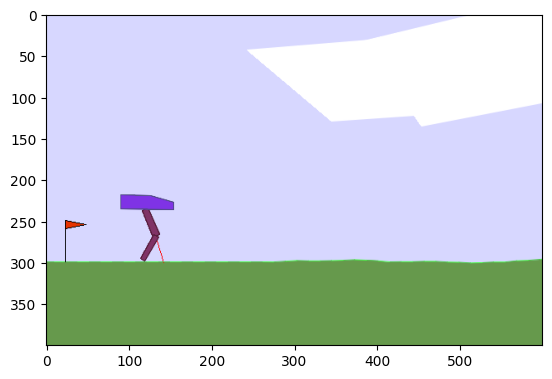

[-0.01438908 -0.01172681 -0.01026428 -0.02413967  0.4839136   0.48529637
  0.05094469 -0.43953514  0.          0.36189586  0.18645704  0.09322679
 -0.10283538  0.          0.44773957  0.45282432  0.46867213  0.49724144
  0.542494    0.6119262   0.7202902   0.89985055  1.          1.        ]
-0.0409330047418662


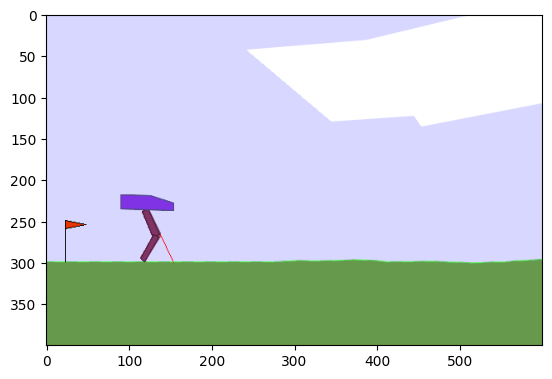

[-0.02313966 -0.01751981 -0.01422895 -0.04263718  0.5393097   0.7010341
 -0.02413666 -0.6424853   0.          0.38134417  0.2428083   0.07906199
 -0.11775351  0.          0.44570172  0.45076334  0.466539    0.49497828
  0.5400249   0.60914105  0.71701187  0.89575493  1.          1.        ]
-0.057964060306549076


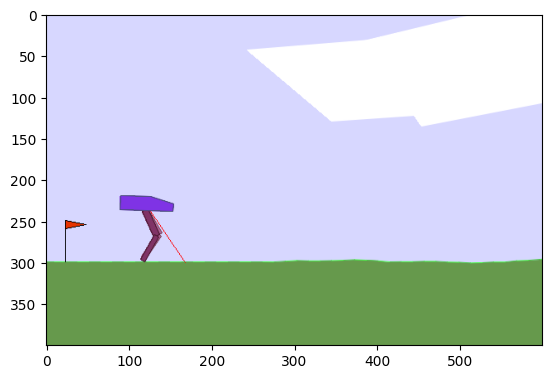

[-0.03473121 -0.02323513 -0.01787753 -0.06136053  0.6106429   0.90286636
 -0.11759162 -0.8071975   0.          0.4051405   0.2981426   0.06331313
 -0.13230906  0.          0.44276953  0.44779783  0.4634697   0.4917219
  0.53647214  0.60513365  0.71229476  0.88986194  1.          1.        ]
-0.07464647029836854


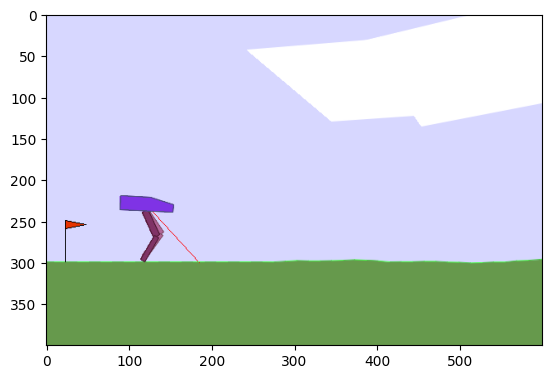

[-0.04785064 -0.02631773 -0.01944901 -0.07926548  0.68982303  1.
 -0.21553004 -0.8497925   0.          0.4312575   0.327569    0.04669344
 -0.13969767  0.          0.43898913  0.44397452  0.4595126   0.48752356
  0.5318917   0.59996694  0.7062132   0.88226426  1.          1.        ]
-0.08331691086292267


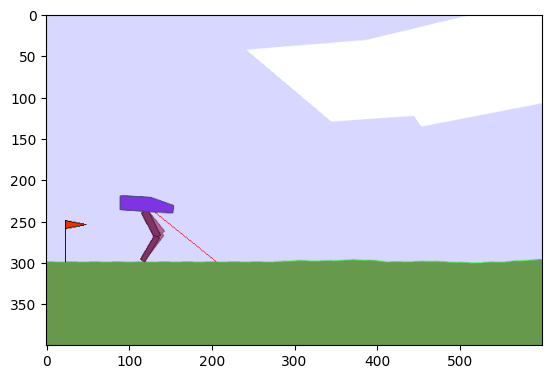

[-0.0613003  -0.02699197 -0.02082461 -0.09486253  0.7692733   1.0000001
 -0.30664492 -0.79104424  0.          0.4735859   0.52726436 -0.00463665
 -0.41908383  1.          0.43447497  0.43940908  0.45478737  0.4825103
  0.52642226  0.59379745  0.6989511   0.87319183  1.          1.        ]
-0.08593714470664779


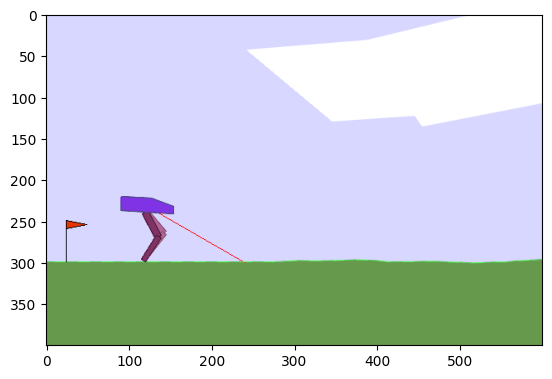

[-0.07488241 -0.02726659 -0.02059658 -0.11152027  0.8488868   1.
 -0.3916464  -0.73819304  0.          0.5188335   0.56503546 -0.06091511
 -0.46528873  1.          0.4291795   0.43405348  0.44924432  0.47662935
  0.52000606  0.58656013  0.69043213  0.8625492   1.          1.        ]
-0.08642170687516412


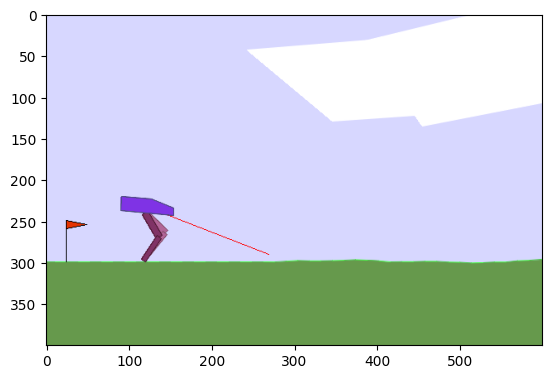

[-0.08853471 -0.02741585 -0.02019429 -0.12818658  0.9286221   1.
 -0.47051275 -0.6855149   0.          0.5665144   0.59701747 -0.12143469
 -0.5047638   1.          0.42310277  0.42790774  0.4428835   0.4698808
  0.51264334  0.57825506  0.6806564   0.8503364   1.          1.        ]
-0.08647512008746702


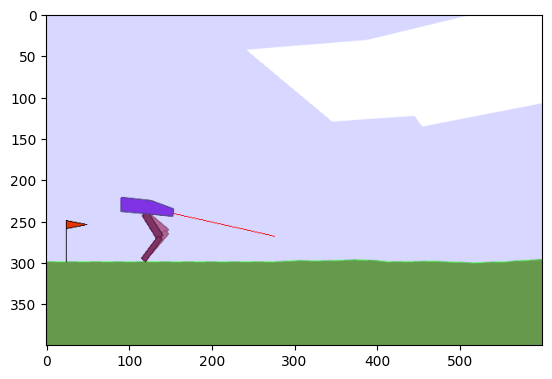

[-0.10219999 -0.0274507  -0.01962955 -0.14485268  1.0084523   1.0000001
 -0.5432322  -0.6331236   0.          0.61625177  0.6240881  -0.18558502
 -0.53853434  1.          0.41624507  0.42097217  0.4357052   0.46226493
  0.5043344   0.56888264  0.6696242   0.83655405  1.          1.        ]
-0.08612671852111817


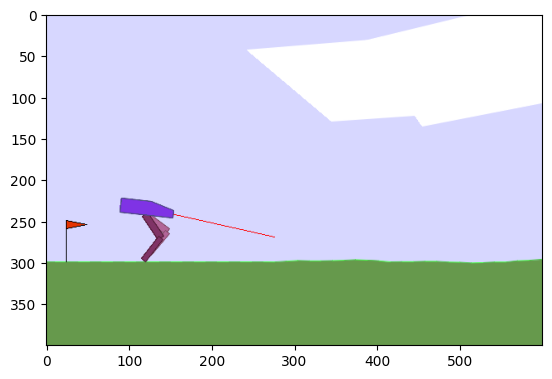

[-0.11582796 -0.02738477 -0.01891501 -0.16151081  1.0883528   1.
 -0.60980606 -0.5810749   0.          0.66774786  0.64712626 -0.25287247
 -0.5675875   1.          0.40860713  0.41324747  0.42771018  0.45378253
  0.49508002  0.55844384  0.65733683  0.8212036   1.          1.        ]
-0.08541745801766595


In [ ]:
env.reset(seed=42)
for i in range(10):
    action = tf.constant([0.15,0,0,0])
    observation, reward, terminated, truncated, info = env.step(action)
    im = env.render()
    plt.imshow(im)
    plt.show()
    print(observation)
    print(reward)

In [ ]:
import numpy as np
import logging
logging.getLogger('tensorflow').disabled = True
import tensorflow as tf
import keras
import cv2
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
class DQN:

    def __init__(self,model_name,env_name,n_layers):
        self.env = gym.make(env_name,render_mode="rgb_array")
        self.n_outputs = env.action_space.shape[0]
        n_obs = self.env.reset(seed=42)[0].shape[0]
        try:
            self.model = keras.models.load_model(model_name)
        except:
            self.model = tf.keras.Sequential()
            self.model.add(tf.keras.layers.Dense(32, activation="elu", input_shape=[n_obs]))
            for i in range(n_layers):
                self.model.add(tf.keras.layers.Dense(32, activation="elu"))
            self.model.add(tf.keras.layers.Dense(self.n_outputs, activation="tanh"))
            self.model.save(model_name)
        self.replay_buffer = deque(maxlen=2000)
        self.batch_size = 32
        self.discount_factor = 0.95
        self.optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
        self.loss_fn = tf.keras.losses.mean_squared_error
        self.model_name = model_name


    def epsilon_greedy(self, state):
        if np.random.rand()<self.epsilon:
            return [np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1),np.random.uniform(-1,1)]
        else:
            Q_values = self.model.predict(state[np.newaxis],verbose=0)[0] 
            #np.newaxis augment la dimension de state
            #verbose = 0 => don't show the progress bar of evaluating
            return Q_values
        
    def play_one_step(self, state):
        action = self.epsilon_greedy(state)
        next_state, reward, done, truncated, info = self.env.step(action)
        self.replay_buffer.append((state, action, reward, next_state, done, truncated))
        return next_state, reward, done, truncated, info
    
    
    def sample_experiences(self):
        indexes = np.random.randint(len(self.replay_buffer),size=self.batch_size)
        batch = [self.replay_buffer[index] for index in indexes]
        return [
                np.array([experience[field_index] for experience in batch])
                for field_index in range(6)
            ]    
    def training_step(self):
        experiences = self.sample_experiences()
        states, actions, rewards, next_states, dones, truncateds = experiences
        next_Q_values = self.model.predict(next_states, verbose=0)
        runs = 1.0 - (dones | truncateds)  # episode is not done or truncated
        runs = runs.reshape([runs.size,1])
        rewards = rewards.reshape([runs.size,1])
        target_Q_values = rewards + runs * self.discount_factor * next_Q_values
        with tf.GradientTape() as tape:
            Q_values = self.model(states)
            loss = tf.reduce_mean(self.loss_fn(target_Q_values, Q_values))
        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        self.model.save(self.model_name,overwrite=True)

    def train_n_games(self,n):
        game_length = []
        all_rewards = []
        for episode in range(n):
            obs, info = self.env.reset()   
            game_reward = 0
            for step in range(500):
                self.epsilon = max(1-episode/n,0.01)
                obs, reward, done, truncated, info = self.play_one_step(obs)
                final_step=step
                game_reward+=reward
                if done or truncated:
                    break
            print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {self.epsilon:.3f}",end="")
            game_length.append(final_step)
            all_rewards.append(game_reward)
            if episode > 10 :
                self.training_step()
        plt.figure("Rewards")
        plt.plot(range(len(game_length)),game_length)
        plt.plot(range(len(all_rewards)),all_rewards)
        plt.show()

    def make_video(self,video_name):
        video = cv2.VideoWriter(video_name+str(".avi"),cv2.VideoWriter_fourcc(*'MJPG'),10,(600,400))
        self.epsilon = 0
        obs, info = self.env.reset()
        for step in range(500):
            obs, reward, done, truncated, info = self.play_one_step(obs)
            img = self.env.render()
            img = cv2.resize(img,(600,400))
            video.write(img)
            if done or truncated:
                break
        video.release()
        cv2.destroyAllWindows() 
        




In [ ]:
dqn = DQN(model_name="my_bipedal_model1",env_name="BipedalWalker-v3",n_layers=2)
n = 10
dqn.train_n_games(200)

NameError: name 'DQN' is not defined